# Preparing the data for modeling

## Subsetting the data
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.


## Test dataset

In [1]:
data <- read.csv('C:/Users/galie/DataScience/project/final_final_data.csv') 
head (data)

,cum_week1,wk_atm_p,wk_dew_p,wk_avg_max_tmp,wk_avg_tm,wk_min_tm,wk_avg_min_tmp,wk_avg_hum,wk_min_hum,wk_avg_precipitation,...,monthly_precipitation,q_precipitation,min_y_q_precipitation,q_temp,mean_t_d,percipitation,min_y_q_temp,max_y_precipitation,seasonality,per_seasonality
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,943.7298,18.03250,30.78000,24.19155,15.8,19.00000,71.23571,25,3.22285714,...,12.822857,84.49714,17.98552,22.56830,17.93779,84.11238,17.93779,42.20571,0.16489076,-0.2488066
2,2,941.4388,18.37952,28.67143,22.99917,15.8,19.44286,77.61310,29,9.60000000,...,12.822857,84.49714,17.98552,22.56830,17.93779,84.11238,17.93779,42.20571,0.16489076,-0.2488066
3,9,943.1124,18.79512,27.91429,22.44643,16.7,19.18857,81.58214,33,12.01714286,...,42.205714,74.85238,17.98552,21.43708,17.93779,84.11238,17.93779,42.20571,-0.01727395,2.4782576
4,34,948.7310,13.33714,24.80286,18.25333,9.2,13.66571,75.72381,23,0.62285714,...,5.681905,29.65905,17.98552,19.37982,17.93779,84.11238,17.93779,42.20571,0.38628365,-1.1052278
5,7,942.2117,18.41726,30.44286,23.95131,15.5,18.72000,73.48571,37,0.02857143,...,42.205714,74.85238,17.98552,21.43708,17.93779,84.11238,17.93779,42.20571,-0.01727395,2.4782576
6,8,942.8707,17.91762,30.70286,23.93357,15.1,18.53429,71.73810,31,0.03428571,...,42.205714,74.85238,17.98552,21.43708,17.93779,84.11238,17.93779,42.20571,-0.01727395,2.4782576


In [2]:
dim(data)
# it's a small data set.. 

[1] 310  33

In [3]:
summary(data)

   cum_week1         wk_atm_p        wk_dew_p      wk_avg_max_tmp 
 Min.   :  1.00   Min.   :931.2   Min.   : 9.826   Min.   :21.14  
 1st Qu.: 78.25   1st Qu.:942.6   1st Qu.:14.206   1st Qu.:25.15  
 Median :155.50   Median :944.5   Median :16.537   Median :27.29  
 Mean   :155.50   Mean   :945.0   Mean   :16.230   Mean   :27.41  
 3rd Qu.:232.75   3rd Qu.:947.7   3rd Qu.:18.345   3rd Qu.:29.54  
 Max.   :310.00   Max.   :955.8   Max.   :20.966   Max.   :34.28  
   wk_avg_tm       wk_min_tm     wk_avg_min_tmp     wk_avg_hum   
 Min.   :14.31   Min.   : 4.30   Min.   : 8.989   Min.   :61.00  
 1st Qu.:18.73   1st Qu.: 9.30   1st Qu.:14.374   1st Qu.:73.29  
 Median :21.32   Median :12.90   Median :17.271   Median :77.22  
 Mean   :21.00   Mean   :12.49   Mean   :16.706   Mean   :76.68  
 3rd Qu.:23.17   3rd Qu.:15.50   3rd Qu.:19.005   3rd Qu.:80.95  
 Max.   :25.65   Max.   :18.80   Max.   :21.269   Max.   :89.04  
   wk_min_hum    wk_avg_precipitation  num_patients     log_num_patie

In [4]:
vn <- setdiff(names(data),c("cum_week1"))
vn

[1] "wk_atm_p"                 "wk_dew_p"                
 [3] "wk_avg_max_tmp"           "wk_avg_tm"               
 [5] "wk_min_tm"                "wk_avg_min_tmp"          
 [7] "wk_avg_hum"               "wk_min_hum"              
 [9] "wk_avg_precipitation"     "num_patients"            
[11] "log_num_patients"         "log_wk_avg_precipitation"
[13] "dry_week_yn"              "alot_of_patients_yn"     
[15] "ann_mean_tmp"             "mean_diu_range"          
[17] "max_y_temp"               "min_y_temp"              
[19] "annual_range"             "Isothermality"           
[21] "mean_temp"                "ann_precipitation"       
[23] "monthly_precipitation"    "q_precipitation"         
[25] "min_y_q_precipitation"    "q_temp"                  
[27] "mean_t_d"                 "percipitation"           
[29] "min_y_q_temp"             "max_y_precipitation"     
[31] "seasonality"              "per_seasonality"

In [9]:
library(devtools)
install_github("karpatit/mechkar")
require(mechkar)

utf8       (1.2.1   -> 1.2.2 ) [CRAN]
rlang      (0.4.10  -> 0.4.11) [CRAN]
fansi      (0.4.2   -> 0.5.0 ) [CRAN]
ellipsis   (0.3.1   -> 0.3.2 ) [CRAN]
colorspace (2.0-0   -> 2.0-2 ) [CRAN]
Rcpp       (1.0.6   -> 1.0.7 ) [CRAN]
tibble     (3.1.0   -> 3.1.4 ) [CRAN]
stringi    (1.5.3   -> 1.7.4 ) [CRAN]
xfun       (0.22    -> 0.26  ) [CRAN]
htmltools  (0.5.1.1 -> 0.5.2 ) [CRAN]
zip        (2.1.1   -> 2.2.0 ) [CRAN]
readr      (1.4.0   -> 2.0.1 ) [CRAN]
openxlsx   (4.2.3   -> 4.2.4 ) [CRAN]
curl       (4.3     -> 4.3.2 ) [CRAN]
haven      (2.3.1   -> 2.4.3 ) [CRAN]
dplyr      (1.0.5   -> 1.0.7 ) [CRAN]


Installing 16 packages: utf8, rlang, fansi, ellipsis, colorspace, Rcpp, tibble, stringi, xfun, htmltools, zip, readr, openxlsx, curl, haven, dplyr

Installing packages into 'C:/Users/galie/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'utf8' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'utf8'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\utf8\libs\x64\utf8.dll to C:\Users\galie\Documents\R\win-library\4.0\utf8\libs\x64\utf8.dll: Permission denied"
Warning message:
"restored 'utf8'"


package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\galie\Documents\R\win-library\4.0\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'fansi' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'fansi'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\fansi\libs\x64\fansi.dll to C:\Users\galie\Documents\R\win-library\4.0\fansi\libs\x64\fansi.dll: Permission denied"
Warning message:
"restored 'fansi'"


package 'ellipsis' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ellipsis'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\ellipsis\libs\x64\ellipsis.dll to C:\Users\galie\Documents\R\win-library\4.0\ellipsis\libs\x64\ellipsis.dll: Permission denied"
Warning message:
"restored 'ellipsis'"


package 'colorspace' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'colorspace'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\colorspace\libs\x64\colorspace.dll to C:\Users\galie\Documents\R\win-library\4.0\colorspace\libs\x64\colorspace.dll: Permission denied"
Warning message:
"restored 'colorspace'"


package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\galie\Documents\R\win-library\4.0\Rcpp\libs\x64\Rcpp.dll: Permission denied"
Warning message:
"restored 'Rcpp'"


package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\galie\Documents\R\win-library\4.0\tibble\libs\x64\tibble.dll: Permission denied"
Warning message:
"restored 'tibble'"


package 'stringi' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'stringi'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\stringi\libs\icudt61l.dat to C:\Users\galie\Documents\R\win-library\4.0\stringi\libs\icudt61l.dat: Invalid argument"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\stringi\libs\x64\stringi.dll to C:\Users\galie\Documents\R\win-library\4.0\stringi\libs\x64\stringi.dll: Permission denied"
Warning message:
"restored 'stringi'"


package 'xfun' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'xfun'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\xfun\libs\x64\xfun.dll to C:\Users\galie\Documents\R\win-library\4.0\xfun\libs\x64\xfun.dll: Permission denied"
Warning message:
"restored 'xfun'"


package 'htmltools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'htmltools'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\htmltools\libs\x64\htmltools.dll to C:\Users\galie\Documents\R\win-library\4.0\htmltools\libs\x64\htmltools.dll: Permission denied"
Warning message:
"restored 'htmltools'"


package 'zip' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'zip'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\zip\libs\x64\zip.dll to C:\Users\galie\Documents\R\win-library\4.0\zip\libs\x64\zip.dll: Permission denied"
Warning message:
"restored 'zip'"


package 'readr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\readr\libs\x64\readr.dll to C:\Users\galie\Documents\R\win-library\4.0\readr\libs\x64\readr.dll: Permission denied"
Warning message:
"restored 'readr'"


package 'openxlsx' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'openxlsx'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\openxlsx\libs\x64\openxlsx.dll to C:\Users\galie\Documents\R\win-library\4.0\openxlsx\libs\x64\openxlsx.dll: Permission denied"
Warning message:
"restored 'openxlsx'"


package 'curl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'curl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\curl\libs\x64\curl.dll to C:\Users\galie\Documents\R\win-library\4.0\curl\libs\x64\curl.dll: Permission denied"
Warning message:
"restored 'curl'"


package 'haven' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'haven'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\haven\libs\x64\haven.dll to C:\Users\galie\Documents\R\win-library\4.0\haven\libs\x64\haven.dll: Permission denied"
Warning message:
"restored 'haven'"


package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\galie\Documents\R\win-library\4.0\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\galie\Documents\R\win-library\4.0\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\galie\AppData\Local\Temp\RtmpeKpAwb\downloaded_packages
v  checking for file 'C:\Users\galie\AppData\Local\Temp\RtmpeKpAwb\remotes4a6870d55e00\karpatit-mechkar-da2c054/DESCRIPTION' (360ms)
-  preparing 'mechkar':
v  checking DESCRIPTION meta-information
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  building 'mechkar_1.14.10.tar.gz'
   


Installing package into 'C:/Users/galie/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

Warning message in i.p(...):
"installation of package 'C:/Users/galie/AppData/Local/Temp/RtmpeKpAwb/file4a68117b806/mechkar_1.14.10.tar.gz' had non-zero exit status"
Loading required package: mechkar

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'mechkar'"


### Since it's not working, I copied the whole code from github.. 

In [23]:
############################################################################
#####   Package mechkar                                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-01                                       ####
############################################################################

############################################################################
#####   DATA VISUALIZATION                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2014-03-12                                       ####
#####   Last Modified: 2020-11-03                                       ####
############################################################################

###########  Functions   ##############################################

###################################################

exploreData <- function(data=data, y=NULL, rn=NULL, factorSize=10, dir=tempdir(), debug=FALSE, ...) {

  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }

  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=TRUE),sd=stats::sd(x,na.rm=TRUE))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }

  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }

  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }

  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }

  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }

  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }

  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=TRUE), "<br><u>Max date</u>:",max(x, na.rm=TRUE) , "</div>")
    return(html)
  }

  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }

  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }

  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    #pl <- stats::scatter.smooth(df$x,col=df$cl)
    pl <- tryCatch({
      stats::scatter.smooth(df$x,col=df$cl,xlab="index")
    }, warning = function(w) {
      suppressWarnings(w)
      #n <- "warning!"
    }, error = function(e) {
      n <- "error!"
    }, finally = {
      graphics::plot(df$x ~ row.names(df),col=df$cl,xlab="index")
    })
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }

  #' @importFrom rlang .data
  getScatterGraph <- function(df=data,x,y,dtype=1) {
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(ggplot2::aes(x=.data[[x]], y=.data[[y]]), method="loess") + ggplot2::xlab(x) + ggplot2::ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(ggplot2::aes(y=.data[[x]], color=.data[[y]])) + ggplot2::xlab(x) + ggplot2::ylab(y) + ggplot2::labs(color=y)
    }
    return(pl)
  }

  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(unique(bp)), collapse=', ' )
    }
    #imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    imgsrc = paste(paste0("fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")

  ################## Check for values for rn ##################
  if(!is.null(rn)) {
    if(length(rn)!=ncol(data)) {
      message("the value of the 'rn' argument was avoided because it does not have the same number of columns of the dataframe")
      rn <- NULL
    }
    xname <- rn
    names(xname) <- names(data)
  } else {
    xname <- NULL
  }

  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  srcdir <- report

  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }

  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }

  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>
      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });
      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });
      $('#myform2').submit(function(e) {
      e.preventDefault();
      });
      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });
      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });
      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });
      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });
      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });
      </script>
      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      background-color:#4C6F50;
      color: #fff;
      }
      .Row
      {
      display: table-row;
      }
      .Row:nth-child(even) {
        background-color: #56882433;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: Arial, Helvetica, sans-serif;
      font-size: 14px;
      }
      </style>
      </head>
      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)

  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)

  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)
  ln <- length(data)
  ii <- 0
  pb <- utils::txtProgressBar(min=0,max=ln,style=3)
  for(x in names(data)) {

    ## check if the value has at least more than one unique value...
    if(length(unique(data[[x]])) < 2) {
      message(paste("The variable",x,"has less than two unique values, so will not be included"))
    } else {

      if(debug==TRUE) {
        message(x)
      } else {
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
      }

      html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b><p>",xname[x],"</p></div>")

      cat(html, file = myhtml, sep='\n', append=TRUE)
      #### initialize the first graph
      imgname = paste(fig,"/",x, "_1.png",sep="")
      #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
      imgsrc = paste("fig/",x, "_1.png",sep="")
      ### send the data with the type to generate the correct graph..
      grDevices::png(imgname)
      drawGraphOne(x, data[[x]], data_types[x])
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # second, show the statistics
      html <- getStats(data[[x]],data_types[x])
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # third, determine the outliers
      imgname = paste(fig,"/",x, "_2.png",sep="")
      if(data_types[x]==1) {
        grDevices::png(imgname)
        getOutlierGraph(data[[x]])
        grDevices::dev.off()
        html <- getOutliersHtml(x,data[[x]],srcdir)
      } else {
        html <- "<div class='Cell'></div>"
      }
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # fourth, if y is assigned, make a corresponding plot
      if(is.null(y)==FALSE) {
        imgname = paste(fig,"/",x, "_3.png",sep="")
        #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
        imgsrc = paste("fig/",x, "_3.png",sep="")
        grDevices::png(imgname)
        ### scatter.smooth(data[[x]] ~ data[[y]])
        #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
        plot(getScatterGraph(data,x,y,data_types[y]))
        grDevices::dev.off()
        html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
        cat(html, file = myhtml, sep='\n', append=TRUE)
      }
      html <- paste("</div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      }
    }
  }
  utils::setTxtProgressBar(pb,ln)
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  ## call the default browser or the one which is open (if any)
  browseURL(myhtml)
}

###################### END exploreData ###############


############################################################################
#####   TABLE 1                                                         ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2020-11-03                                       ####
############################################################################

####################  FUNCTIONS  ###########################################
#### Usage:
####   x: character vector with the name of the variables
####   y: the name of the strata variable (optional)
####   rn: character vector with the text we want to replace the variable names
####   data: the dataset to be used
####   miss: include missing statistics: [0=none, 1=only for categorical variables, 2=for all variables]
####   excel: export the table to excel [0=no, 1=yes]
####   excel_file: the name of the excel file we want to save the table (optional)
####
###################

Table1 <- function(x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL,
                    debug=FALSE) {
  ### define sub-functions
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL
  
  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    if(is.null(factorVars)==TRUE) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==FALSE & (v %in% factorVars)) | (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == TRUE & sum(is.na(data[[v]])==TRUE) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==TRUE)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == TRUE | is.null(factorVars)==FALSE ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }
  
  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE &
                       ((is.null(factorVars)==FALSE & (v %in% factorVars)) |
                          (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"has no data; avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1; avoided"))
          }
        } else if (is.numeric(data[[v]])==TRUE & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==FALSE ) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==TRUE) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset; avoiding"))
        }
      }
      q <- q + 1
      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      } else {
        message(v)
      }
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }
  
  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")
        
        ln <- length(x)
        ii <- 0
        pb <- utils::txtProgressBar(min=0,max=ln-1,style=3)
        
        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==TRUE & categorize==TRUE & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==TRUE) {
              if (messages==TRUE) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]])))[1, 4]), 3))
                } else {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE))[1, 3]), 3))
                }
              }, warning = function(w) {
                suppressWarnings(w)
                #ww <- "suppress warnings"
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if(length(unique(data[[v]])) < 15) {
                if (min(table(data[[v]],data[[y]])) > 5) {
                  pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
                } else {
                  if(min(table(data[[v]],data[[y]]))==0) {
                    #in cases where there are cells with zero, we use Fisher's exact test
                    tryCatch(
                      pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                      error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                  } else {
                    pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                  }
                }
              } else {
                pval <- NA
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          if(debug==FALSE) {
            utils::setTxtProgressBar(pb,ii)
            ii <- ii + 1
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### check for x's witch have one unique values, get them out.
  vv <- NULL
  j <- 0
  jj <- NULL
  for(v in x) {
    if(length(unique(data[[v]])) < 2) {
      vv <- c(vv,v)
      j <- j + 1
      jj <- c(jj,j)
    }
  }
  
  if (length(vv)>0) {
    warning(paste("The following variables have unique values and will not be included in the analysis:",vv))
    x <- setdiff(x, vv)
    if(is.null(rn)==FALSE & length(jj)>0) {
      rn <- rn[-jj]
    }
  }
  
  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- as.data.frame(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==FALSE) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==TRUE) {
            message("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          message("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  
          tab[1,5] <- lv
          tabaaa1 <- base::merge(tabaaa1, tab, all.x=TRUE)
        }
        # what to do with dichotomous variables? We remove the "Zero" label
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- tabaaa1[tabaaa1$Del==0,]
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- base::merge(tabaaa1, ptab,all.x=TRUE)
        tabaaa1 <- tabaaa1[tabaaa1$Pop != " -- ",]
      }
    }
  }
  
  tabaaa1$n <- NULL
  tabaaa1$Del <- NULL
  ### format the table for printing
  n <- ncol(tabaaa1)
  names(tabaaa1)[1] <- "Variables"
  names(tabaaa1)[2] <- ""
  names(tabaaa1)[3] <- "Population"
  names(tabaaa1)[n] <- "p-value"
  tabaaa1[,n] <- as.character(tabaaa1[,n])
  tabaaa1[,n] <- ifelse(is.na(tabaaa1[,n]),"",tabaaa1[,n])
  tabaaa1[,n] <- ifelse(tabaaa1[,n]=='0',"<0.001",tabaaa1[,n])
  
  ##### check for export to excel
  if (excel==1) {
    writexl::write_xlsx(tabaaa1,excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############


############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
#####   Last Modified: 2020-11-03                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = FALSE)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message(" ")
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab <- checkTrainTest(get(train_name),get(test_name))
    tab <- tab[tab[,1]!="traintest_ind_",]
    names(tab)[4] <- train_name
    names(tab)[5] <- test_name
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==TRUE) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==TRUE) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  } else {
    row.names(tb) <- names(mod$coefficients)
  }
  return(tb)
}

############################################################################
#####   TABLE2 WITH FORESTPLOT                                          ####
#####   Description: Generates a publication ready version of a model   ####
#####      risk table with a forestplot graph inside it                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2018-05-17                                       ####
############################################################################
Table2.forestplot <- function(mod, nr=NULL) {
  opar <- graphics::par(no.readonly = TRUE)
  on.exit(graphics::par(opar))
  tryCatch({tbA <- Table2(mod)},
           error=function(cond) {
             message("This model type is not supported !")
             return(NA)
           })
  if(exists("tbA")) {
    ## max value for x axis
    xmax <- max(tbA[,3])
    if(xmax < 5) {
      #axis(1, seq(0,xmax,by=.5), cex.axis=.5)
     rh <- 12
    } else {
      rh <- 18
    }
    colnames(tbA) <- c("coef","ci_low","ci_high","p_value")
    j <- nrow(tbA)
    nm <- row.names(tbA)
    rowseq <- seq(nrow(tbA),1)
    graphics::par(mai=c(1,0,0,0),new=FALSE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    for (i in 1:j) {
      graphics::abline(h=i-0.5,lwd=1, lty=3, col="gray")
    }
    graphics::par(new=TRUE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    graphics::axis(1, seq(0,xmax,by=.5), cex.axis=.5)
    graphics::segments(1,-1,1,j, lty=3)
    graphics::segments(tbA$ci_low, rowseq, tbA$ci_hi, rowseq)
    graphics::mtext('Lower risk',1, line=2.5, at=0, cex=.5, font=2)
    graphics::mtext('Higher risk',1.5, line=2.5, at=2, cex=.5, font=2)
    if (is.null(nr)) {
      nr <- data.frame(vars=names(mod$coefficients))
      col2 <- as.character(gsub(x=nr$vars, pattern=paste(names(mod$xlevels),collapse="|"),replacement=" "))
      col3 <- data.frame(vars=as.character(NULL),col3=as.character(NULL))
      for(n in names(mod$xlevels)) {
        col3 <- rbind(col3, cbind(vars=paste(n,levels(mod$data[[n]])[2],sep=""),col3=n))
      }
      nr$col1 <- ifelse(nr$vars %nin% setdiff(names(mod$coefficients),names(mod$data)),as.character(nr$vars),'')
      nr$col2 <- ifelse(nr$vars %nin% col2, col2, " ")
      nr[1,"col1"] <- ifelse(nr[1,"vars"]=="(Intercept)","(Intercept)",nr[1,"vars"])
      nr$col1 <- ifelse(nr$vars %in% col3, col3, nr$col1)
      nr <- merge(nr,col3, x.all=TRUE)
      nr$col1 <- ifelse(is.na(nr$col3)==TRUE,nr$col1,as.character(nr$col3))
      nr$col1 <- ifelse(grepl(":",nr$vars),nr$vars,nr$col1)
    } else {
      nr <- data.frame(vars=nr)
      if (length(nm)==nrow(nr)) {
        nr <- cbind(nm,nr)
        colnames(nr) <- c("vars","col1","col2")
      } else {
        return("The number of variables in the table of names (nr) you give is not equal to the number of variables in the model.
               Please check the names you entered in the table.")
      }
    }
    ### this part writes the variable titles
    graphics::text(-10,j+2, "Variables", cex=.75, font=2, pos=4)
    graphics::abline(h=j+1, col="gray", lwd=1.5, lty=1)
    graphics::text(-10,rowseq, nr[,2], cex=.75, pos=4, font=3)
    ### and this writes the categories for nominal variables
    graphics::text(-6,rowseq, nr[,3], cex=.75, pos=4)
    graphics::text(-3,j+2, "Odds Ratio (95% CI)", cex=.75, font=2, pos=4)
    t3 <- ifelse(!is.na(tbA$coef),
                 with(tbA, paste(format(coef,nsmall = 3,digits = 3),' (',format(ci_low,nsmall = 3,digits = 3),'-',format(ci_high,nsmall = 3,digits = 3),')',sep='')), '')
    graphics::text(xmax,rowseq, t3, cex=.75, pos=4, bg="lightgreen")
    graphics::text(xmax+5,j+2, "P Value", cex=.75, font=2, pos=4)
    t4 <- ifelse(!tbA$p_value==0, paste0(" ",format(tbA$p_value,nsmall = 3,digits = 3)), '<0.001')
    graphics::text(xmax+5,rowseq, t4, cex=.75, pos=4)
    graphics::box(which = "outer",col="darkgray",lwd=3)
  }
  graphics::par(mai=c(1,1,1,1),new=FALSE)
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR MEANS                        ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
MeanCI <- function(x,round=3) {
  m <- mean(x,na.rm=TRUE)
  s <- stats::sd(x,na.rm=TRUE)
  ci <- 1.96 * (s/sqrt(length(x)))
  CImin <- m - ci
  CImax <- m + ci
  return(c(mean=round(m,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR PROPORTIONS                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
PropCI <- function(x,round=3,multi=100,ref=2) {
  recode <- function(x,ref) {
    y <- x
    if (ref==2) {
      y[which(x==min(x))] <- 0
      y[which(x==max(x))] <- 1
    } else {
      y[which(x==max(x))] <- 0
      y[which(x==min(x))] <- 1
    }
    return(y)
  }
  if (is.factor(x)==TRUE && length(levels(x))==2) {
    p <- levels(x)[ref]
    y <- recode(as.numeric(x),ref)
  } else if (is.numeric(x)==TRUE && length(levels(factor(x)))==2) {
    p <- ifelse(ref==2,max(x),min(x))
    y <- recode(x,ref)
  } else if (length(levels(factor(x)))==2) {
    p <- levels(factor(x))[ref]
    y <- recode(as.numeric(factor(x)),ref)
  } else {
    return("The variable must be dichotomic")
  }
  freq <- (mean(y,na.rm=TRUE))
  CI <- 1.96 * sqrt((freq * (1-freq))/length(y))
  CImin <- (freq - CI)*multi
  CImax <- (freq + CI)*multi
  return(c(var=p,freq=round(freq*multi,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   GENERATE A TABLE WITH VALIDITY TESTS                            ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

################# Validity Test #########################################
#
#                    Observed
#                              +                  -
#          -----------------------------------------
# Predicted   +    TP                FP        |     PPV
#                                            a                   b         |  e (e1-e2)
#                                                                             |
#                                                             |
#                         -    FN       TN        |     NPV
#                                c        d         |  f (f1-f2)
#                      ----------------------------------------
#
#                        Sensitivity Specificity  |  Prevalence
#                          g (g1-g2)  h (h1-h2)   |  i (i1-i2)
#
#
#       Chi-square
#       Corrected Chi-square
#       Error: (FP+FN)/(TP+FP+FN+TN)
#       Accuracy: (TP+TN)/(TP+FP+FN+TN)
#       Precision: TP/(TP+FP)
#       Recall: TP/(TP+FN)
#
#       Harmonic mean of precision and recall (F1-Score):
#        f1-Score: 2 * (Precision * Recall)/(Precision + Recall)
#
#####################################################################

ValidityTest <- function (a, b, c, d, multi = 100, caption = "Validity of the Model/Screening")
{

  proportionCI <- function(p, n, multi = 100, prob = 0.95, dec = 2) {
    alpha <- ifelse(prob != 0.95,0.01,0.05)
    ci <- Hmisc::binconf(p,n,alpha=alpha,method="wilson")
    pci = paste(round(ci[1] * multi, dec), " (",
                round(ci[2] * multi, dec), "-",
                round(ci[3] * multi, dec), ")",
                sep = "")
    return(pci)
  }

  lr.ci <- function( a,b,c,d, sig.level=0.95 ) {
    ### Positive and negative likelihood ratios with their 95% CI...
    alpha <- 1 - sig.level
    spec <- d/(b+d)
    sens <- a/(a+c)
    lr.pos <- sens/(1 - spec)
    if ( a != 0 & b != 0 ) {
      sigma2 <- (1/a) - (1/(a+c)) + (1/b) - (1/(b+d))
      lower.pos <- lr.pos * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a == 0 & b == 0 ) {
      lower.pos <- 0
      upper.pos <- Inf
    } else if ( a == 0 & b != 0 ) {
      a.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      lower.pos <- 0
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b) - (1/(b+d))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a != 0 & b == 0 ) {
      b.temp <- (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a) - (1/(a+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- Inf
    } else if ( (a == (a+c)) & (b == (b+d)) ) {
      a.temp <- a - (1/2)
      b.temp <- b - (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    lr.neg <- (1 - sens)/spec
    if ( c != 0 & d != 0 ) {
      sigma2 <- (1/c) - (1/(a+c)) + (1/d) - (1/(b+d))
      lower.neg <- lr.neg * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c == 0 & d == 0 ) {
      lower.neg<- 0
      upper.neg <- Inf
    } else if ( c == 0 & d != 0 ) {
      c.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      lower.neg <- 0
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d) - (1/(b+d))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c != 0 & d == 0 ) {
      d.temp <- (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- Inf
    } else if ( (c == (a+c)) & (d == (b+d)) ) {
      c.temp <- c - (1/2)
      d.temp <- d - (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    list(
      lr.pos=lr.pos, lower.pos=lower.pos, upper.pos=upper.pos,
      lr.neg=lr.neg, lower.neg=lower.neg, upper.neg=upper.neg
    )
  }

  ppv <- proportionCI(a, a + b, multi)
  npv <- proportionCI(d, c + d, multi)
  sensit <- proportionCI(a, c + a, multi)
  specif <- proportionCI(d, b + d, multi)
  prev <- proportionCI(a + c, (a + b + c + d), multi)
  er <- proportionCI(b + c, (a + b + c + d), multi)
  acc <- proportionCI(a + d, (a + b + c + d), multi)
  prec <- proportionCI(a, (a + b), multi)
  recall <- proportionCI(a, (a + c), multi)
  f1 <- proportionCI(2 * ((a/(a + b)) * (a/(a + c))), ((a/(a + b)) + (a/(a + c))), multi)
  #Odds ratios
  odds <- ((a/c)/(b/d))
  oddsci <- 1.96 * sqrt((1/a)+(1/b)+(1/c)+(1/d))
  oddsratio <- paste(round(odds,2), " (", round(exp(log(odds)-oddsci),2), "-",round(exp(log(odds)+oddsci),2),")",sep="")
  #False positive rate = type I error= 1 - specificity
  fpr <- proportionCI(b, (d + b), multi)
  #False negative rate = type II error= 1 - sensitivity
  fnr <- proportionCI(c, (a + c), multi)
  #Likelihood ratio positive = sensitivity / (1 - specificity)
  # (a/(c+a) / b/(d+b))
  lr <- lr.ci(a,b,c,d,sig.level=0.95)
  plr1 <- paste(round(lr$lr.pos,2), " (", round(lr$lower.pos,2),"-",round(lr$upper.pos,2),")",sep="")
  #Likelihood ratio negative = (1 - sensitivity) / specificity
  # (c/(a+c) / d/(b+d))
  #nlr <- round((c*(b+d))/(d*(a+c)),2)
  #nlr <- ((c*(b+d))/(d*(a+c)))
  nlr1 <-  paste(round(lr$lr.neg,2), " (", round(lr$lower.neg,2),"-",round(lr$upper.neg,2),")",sep="")
  x <- matrix(c(a, b, c, d), byrow = TRUE, 2, 2)
  csq <- tryCatch({
    warning(stats::chisq.test(x))
  }, warning = function(w) {
    message("Using simulated p-value! - ", conditionMessage(w))
    stats::chisq.test(x, simulate.p.value = TRUE)
  })
  xsq <- round(csq$statistic, 2)
  pval <- round(csq$p.value, 2)
  vars <- cbind("", "Observed", "", "")
  vars <- rbind(vars, cbind("", "+", "-", ""))
  vars <- rbind(vars, cbind("Expected", "(TP)", "(FP)", "PPV"))
  vars <- rbind(vars, cbind("+", a, b, ppv))
  vars <- rbind(vars, cbind("", "(FN)", "(TN)", "NPV"))
  vars <- rbind(vars, cbind("-", c, d, npv))
  vars <- rbind(vars, cbind("", "Sensitivity", "Specificity",
                            "Prevalence"))
  vars <- rbind(vars, cbind("", sensit, specif, prev))
  vars <- rbind(vars, cbind("", "", "", ""))
  vars <- rbind(vars, cbind("Chi-square (p-value)", paste(xsq,
                                                          " (", pval, ")", sep = ""), "", ""))
  vars <- rbind(vars, cbind("Error", er, "", ""))
  vars <- rbind(vars, cbind("Accuracy", acc, "",
                            ""))
  vars <- rbind(vars, cbind("Precision", prec, "(Same as PPV)",
                            ""))
  vars <- rbind(vars, cbind("Recall", recall, "(Same as Sensitivity)", ""))
  vars <- rbind(vars, cbind("F1-Score", f1, "(Harmonic mean of",
                            "precision and recall)"))
  vars <- rbind(vars, cbind("Odds ratios", oddsratio, "", ""))
  vars <- rbind(vars, cbind("False positive rate", fpr, "(type I error)", ""))
  vars <- rbind(vars, cbind("False negative rate", fnr, "(type II error)", ""))
  vars <- rbind(vars, cbind("Positive Likelihood ratio", plr1, "", ""))
  vars <- rbind(vars, cbind("Negative Likelihood ratio", nlr1, "", ""))
  return(vars)
}

############################################################################
#####   Model Validity                                                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-12-01                                       ####
############################################################################

modelValidity <- function (data, model, class, train=FALSE, calib.graph=FALSE)
{
  if ("glm" %in% class(model) | "earth" %in% class(model)) {
    data$pred <- stats::predict(model, newdata = data, type = "response")
  }
  else {
    data$pred <- stats::predict(model, newdata = data, type = "prob")[,2]
  }
  data <- subset(data, is.na(data[["pred"]])==FALSE)
  roc1 <- pROC::roc(data[, class], as.numeric(data[["pred"]]))
  ### GiViTI calibration test
  if(train==FALSE) {
    src="external"
  } else {
    src="internal"
  }
  if(is.factor(data[,class])==TRUE) {data[,class] <- as.numeric(data[,class])-1}
  cb <- givitiR::givitiCalibrationBelt(o=data[,class],e=data[["pred"]],devel=src)
  if(calib.graph==TRUE) {
    graphics::plot(cb, main = "Model calibration", xlab = "Model predicted probability", ylab = "Observed outcome")
  }
  cb <- round(cb$p.value,3)
  ### Hoslem Lemeshow test
  hl <- ResourceSelection::hoslem.test(model$y, stats::fitted(model), g = 10)$p.value
  cm <- table(actual = data[, class], fitted = ifelse(data[["pred"]] >= 0.5, 1, 0))
  mmce <- 1 - (sum(diag(cm))/sum(cm))
  #d <- sjstats::cod(model)$cod
  vr <- MASS::stdres(model)
  if (is.factor(data[, class])==TRUE) {data[,class] <- as.numeric(data[, class])-1}
  acc <- ROSE::accuracy.meas(data[,class],data[["pred"]])
  srme <-sqrt((sum((data[, class] - data[["pred"]])^2,na.rm=TRUE))/nrow(data))
  vld <- cbind(auc = roc1$auc, cimin = pROC::ci(roc1)[1], cimax = pROC::ci(roc1)[3],
               SRME = srme,
               precision = acc$precision, recall = acc$recall, fscore = acc$F,
               NPV =  InformationValue::npv(data[, class], data[["pred"]]), mmce = mmce, Hosmer_Lemeshow = hl,GiViTI_calibration=cb)
  vld <- round(vld, 3)
  return(vld)
}

############################################################################
#####   Model Cutoffs                                                   ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-07-09                                       ####
############################################################################
getModelCutoffs <- function(pred, obs, div=10) {
  #pred <- dc <- NULL
  modValidity <- function(a,b,c,d,cutoff) {
    ppv <- (a/(a+b))*100
    npv <- (d/(c + d))*100
    sensit <- (a/(c + a))*100
    specif <- (d/(b + d))*100
    prev <- ((a + c)/(a + b + c + d))*100
    er <- ((b + c)/(a + b + c + d))*100
    acc <- ((a + d)/(a + b + c + d))*100
    prec <- (a/(a + b))*100
    recall <- (a/(a + c))*100
    lift <- ppv/prev
    f1 <- ((2 * ((a/(a + b)) * (a/(a + c))))/((a/(a + b)) + (a/(a + c))))*100
    return(cbind(cutoff=cutoff,TP=a,FP=b,FN=c,TN=d,sensitivity=sensit,specificity=specif,PPV=ppv,NPV=npv,accuracy=acc,error=er,prevalence=prev,lift=lift,precision=prec,recall=recall,F1_score=f1))
  }
  getQuintiles <- function(x,div=div) {
    cut(x, breaks=c(stats::quantile(x, probs = seq(0, 1, by = 1/div),na.rm = TRUE)),
        include.lowest=TRUE)
  }
  dc <- getQuintiles(pred,div=div)
  fl <- unique(levels(dc))
  res <- NULL
  for (i in 1:length(fl)) {
    # get the selected cutoff
    idx <- dc %nin% fl[i]
    pred1 <- rep(0,length(pred))
    pred1[idx] <- 1
    ####
    mn <- min(pred[dc==fl[i]])
    #tab1 <- table(obs,pred=ifelse(data[["pred"]] > mn,1,0))
    tab1 <- table(pred1,obs)
    res <- rbind(res, round(modValidity(tab1[4],tab1[3],tab1[2],tab1[1],mn),3))
  }
  return(res)
}

############################################################################
#####   AGE ADJUSTED RATES                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
#####   Last Modified: 2020-11-03                                       ####
############################################################################


age_adjusted <- function(dataset,outcome,age,agemin=0,agemax=130,source="who",alpha=0.05) {
  weight <- n <- outcm1 <- wght <- pop <- adj <- res <- NULL
  weighted_pct <- function(dataset,outcome,age,source,agemin,agemax) {
    ###### generate tables
    age_group <- c("0-4","5-9","10-14","15-19","20-24","25-29","30-34",
                   "35-39","40-44","45-49","50-54","55-59","60-64",
                   "65-69","70-74","75-79","80-84","85-89","90-94",
                   "95-99","100+")
    
    age_min <- seq(0,100,5)
    age_max <- c(seq(4,99,5),130)
    who <- c(8860,8690,8600,8470,8220,7930,7610,7150,6590,6040,5370,
             4550,3720,2960,2210,1520,910,440,150,40,5)
    euro <- c(5000,5500,5500,5500,6000,6000,6500,7000,7000,7000,
              7000,6500,6000,5500,5000,4000,2500,1500,800,180,20)
    us <- c(20201362,20348657,20677194,22040343,21585999,21101849,
            19962099,20179642,20890964,22708591,22298125,19664805,
            16817924,12435263,9278166,7317795,5743327,3620459,
            1448366,371244,53364)    
    age.adjust <- data.frame(age_group, age_min, age_max, who, euro, us)
    vn <- c('age_group', 'age_min', 'age_max', source)
    weighting <- age.adjust[age.adjust$age_min>=agemin & age.adjust$age_max<=agemax,vn]
    ages <- data.frame(age=seq(0,120,1))
    
    ages$age_min <- ifelse((ages$age/10)-floor(ages$age/10) < 0.5, floor(ages$age/10)*10, (floor(ages$age/10)*10)+5)
    ages$age_max <- ifelse((ages$age/10)-floor(ages$age/10) < 0.5, (floor(ages$age/10)*10)+4, (floor(ages$age/10)*10)+9)
    ages$age_min <- replace(ages$age_min, ages$age_min > 100,100)
    ages$age_max <- replace(ages$age_max, ages$age_max > 100, 130)
    
    ##### take the correct weighting
    tot <- sum(weighting[,source])
    weighting$weight <- weighting[[source]]/tot
    #weighting <- weighting[ages, on=c("age_min","age_max"), nomatch=0]
    weighting <- merge(weighting, ages, by=c("age_min","age_max"))
    dataset[,"outcome"] <- ifelse(dataset[,outcome]==1,1,0)
    
    ### correct for age names to be able to do the joint
    dataset[,"age"] <- dataset[,age]
    dataset <- data.frame(dataset)
    unw <- (table(dataset[,"outcome"])/nrow(dataset))[2]
    
    #d1 <- dataset[weighting, on="age", nomatch=0]
    d1 <- merge(dataset, weighting, by="age")
    
    #### we have yet calculated the weight.. use it!!!!
    d1 <- d1[,c("age_group","weight","outcome")]
    d2 <-data.frame(outcm1 = (stats::aggregate(d1$outcome, by=list(d1$age_group),FUN=function(x) sum(x)))$x)
    d2$wght <- (stats::aggregate(d1$weight, by=list(d1$age_group),FUN=function(x) max(x)))$x
    d2$pop <- (stats::aggregate(d1$outcome, by=list(d1$age_group),FUN=function(x) length(x)))$x
    d2$adj <- (d2$wght * d2$outcm1)/d2$pop
    wgt <- sum(d2$adj)
    return(cbind(unw,wgt))
  }
  t1 <- nrow(dataset)
  evnt1 <- table(dataset[,outcome])[2]
  res1 <- round(weighted_pct(dataset=dataset,outcome=outcome,age=age,source,agemin,agemax),5)
  res1 <- round(res1,4)
  unw1 <- round(Hmisc::binconf((t1*res1[1]),t1,alpha=alpha),4)
  wgt1 <- round(Hmisc::binconf((t1*res1[2]),t1,alpha=alpha),4)
  g1 <- list(Outcome=outcome,Population=t1,Events=evnt1,
             crude=list(rate=res1[1]*100.0,
                        CImin=unw1[2]*100.0,
                        CImax=unw1[3]*100.0),
             weighted=list(rate=res1[2]*100.0,
                           CImin=wgt1[2]*100.0,
                           CImax=wgt1[3]*100.0)
  )
  return(g1)
}


############################################################################
#####   GET THE MISSINGNESS OF A DATASET                                ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
#####   Last Modified: 2020-11-03                                       ####
############################################################################
### search for the number & % of missinf
### then count the number of rows with complete data

getMissingness <- function(data, getRows=FALSE) {
  desc <- na_count <- na_cnt <- rn <- pred <- dc <- NULL
  l <- nrow(data)
  vn <- names(data)
  ### copy the dataset and replace the NAs by 1 else 0
  nadf <- data.frame(data)
  cnt <- NULL
  miss <- function(x) return(sum(is.na(x) ))
  for(n in vn) {
    nadf[[n]] <- ifelse(is.na(nadf[[n]])==TRUE,1,0)
    cnt <- rbind(cnt, data.frame(n,sum(nadf[[n]])))
  }
  names(cnt) <- c("var","na_count")
  cnt$rate <- round((cnt$na_count / nrow(nadf))*100,1)
  ### now sum by column
  nadf$na_cnt <- 0
  nadf$na_cnt <- rowSums(nadf)
  ### order descending the count of missings and leave only those with missings
  cnt <- cnt[cnt$na_count>0,]
  #cnt <- cnt[order(-rank(cnt$na_count))]
  cnt <- cnt[order(-(cnt$na_count)),]
  #totmiss <- nrow(nadf[nadf$na_cnt==0])
  totmiss <- nrow(nadf[nadf$na_cnt==0,])
  
  idx <- NULL
  msg <- (paste("This dataset has ", as.character(totmiss), " (",as.character(round(totmiss/nrow(data)*100,1)),"%)" ," complete rows. Original data has ",nrow(data)," rows.",sep=""))
  ### check id needs to return the row indexes
  if(getRows==TRUE & totmiss != 0) {
    nadf$rn <- base::seq_len(nrow(data))
    idx <- nadf[nadf$na_cnt==0, "rn"]
  }
  message(msg)
  #return(list(missingness=cnt, message=msg, rows=idx$rn))
  return(list(missingness=cnt, message=msg, rows=idx))
}

In [12]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.05)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) { message(paste("*",v)) }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}

## Test dataset

In [24]:
tab1 <- train_test(data = data[,vn], train_name = "temp", test_name = "test",prop = 0.8, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test



  |                                                                      |   0%

ERROR: Error in cbind(V = rn[q], pval = pval, n = 2): object 'pval' not found


In [25]:
dim(temp)
dim(test)

[1] 248  32

[1] 62 32

In [33]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.05)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) { message(paste("*",v)) }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}

## Train and Dev

In [27]:
tab2 <- train_test(data = temp[,vn], train_name = "train", test_name = "dev",prop = 0.8, seed = 123, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev



  |                                                                      |   0%

ERROR: Error in cbind(V = rn[q], pval = pval, n = 2): object 'pval' not found


In [28]:
dim(train)
dim(dev)

[1] 198  32

[1] 50 32

In [113]:
tab2 %>% filter(pval < 0.05)

V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
traintest_ind_,Median (IQR),1.0 (1.0-1.0),NA,NA,0


In [32]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

### Check the distribution of the outcome on the three subsets

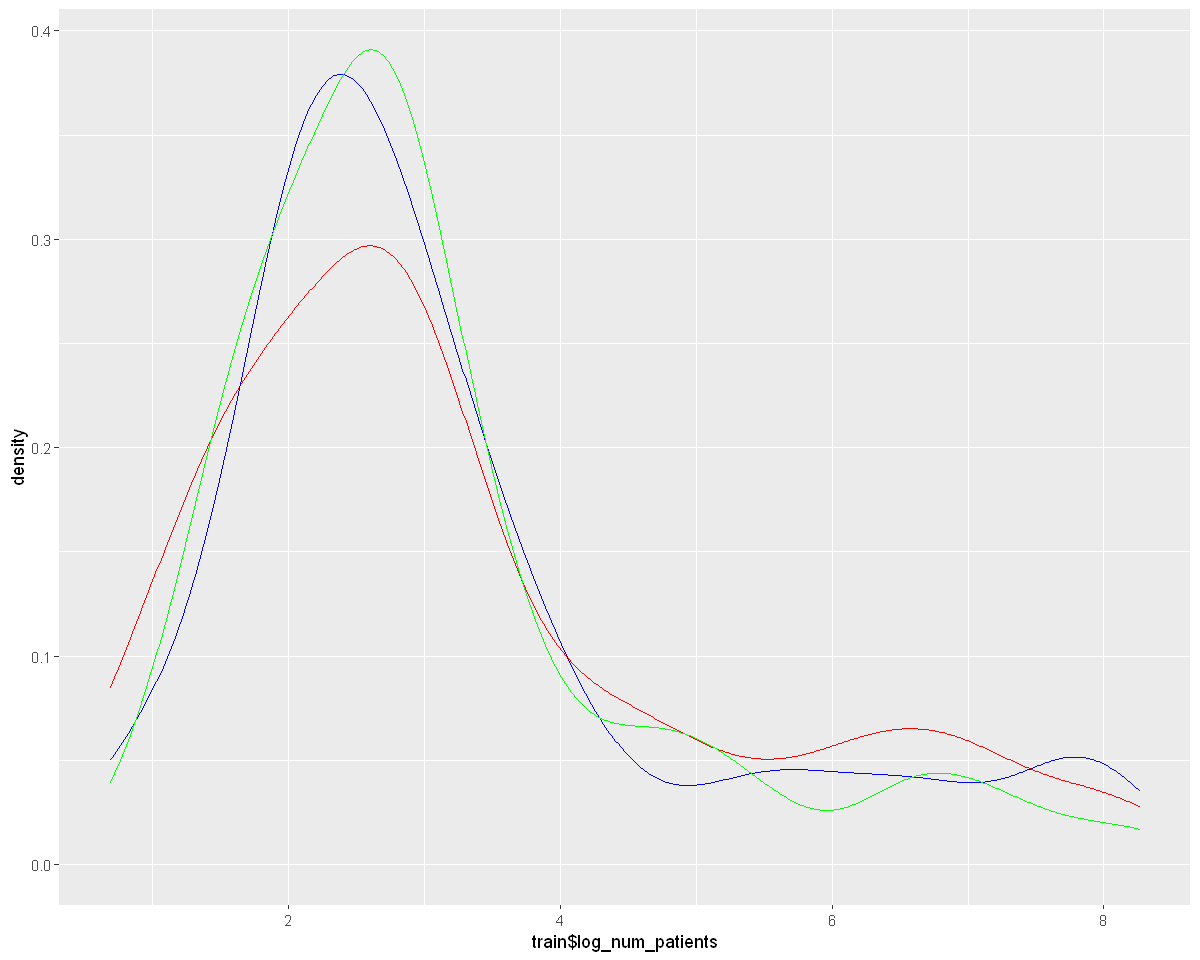

In [31]:
require(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 8)

ggplot() +
    geom_density(aes(x=train$log_num_patients),color="red",alpha=0.3) +
    geom_density(aes(x=dev$log_num_patients),color="blue",alpha=0.3) +
    geom_density(aes(x=test$log_num_patients),color="green",alpha=0.3)

# seems to be working in spite of the struggle above. 

# Train-Dev

In [37]:
library(ranger)

mod1 <- ranger(log_num_patients ~., data=train)


Warning message:
"package 'ranger' was built under R version 4.0.5"


In [38]:
mod1

Ranger result

Call:
 ranger(log_num_patients ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      198 
Number of independent variables:  31 
Mtry:                             5 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       0.1556614 
R squared (OOB):                  0.9556034 

In [39]:
pred1 <- predict(mod1, data=test)

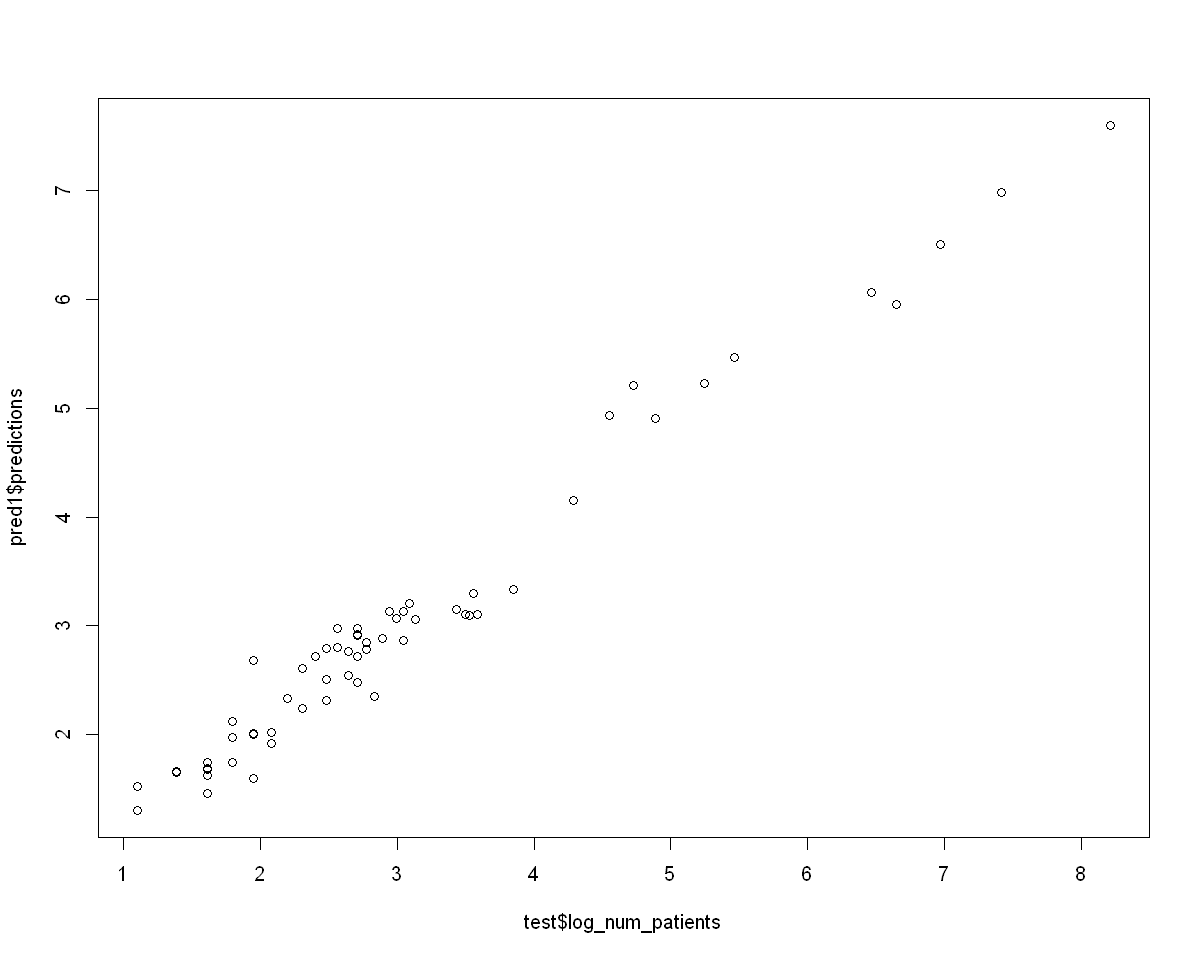

In [40]:
plot(pred1$predictions ~ test$log_num_patients)

# not bad ..

# Dataset Inbalance

In [41]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)}


Loading required package: imbalance

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'imbalance'"
Installing package into 'C:/Users/galie/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'libcoin', 'inum', 'partykit', 'Cubist', 'bnlearn', 'KernelKnn', 'smotefamily', 'FNN', 'C50'




package 'libcoin' successfully unpacked and MD5 sums checked
package 'inum' successfully unpacked and MD5 sums checked
package 'partykit' successfully unpacked and MD5 sums checked
package 'Cubist' successfully unpacked and MD5 sums checked
package 'bnlearn' successfully unpacked and MD5 sums checked
package 'KernelKnn' successfully unpacked and MD5 sums checked
package 'smotefamily' successfully unpacked and MD5 sums checked
package 'FNN' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked
package 'imbalance' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\galie\AppData\Local\Temp\RtmpeKpAwb\downloaded_packages


Loading required package: imbalance

Warning message:
"package 'imbalance' was built under R version 4.0.5"
Loading required package: ROSE

Warning message:
"package 'ROSE' was built under R version 4.0.5"
Loaded ROSE 0.0-4




In [42]:
table(data$alot_of_patients_yn)
table(data$alot_of_patients_yn)/nrow(data)*100


  0   1 
239  71 


       0        1 
77.09677 22.90323 

In [43]:
numPositive <- length(which(data$alot_of_patients_yn == "1"))
numNegative <- length(which(data$alot_of_patients_yn == "0"))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
71,239,168


## Since the number of rows is so low, maybe it's good to go with Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the mayority class. The repeated rows are selected randomly.

In [52]:
#over sampling
data_balanced_over <- ovun.sample(alot_of_patients_yn ~ ., data = data, method = "over",N = numNegative*2, seed = 1)$data
table(data_balanced_over$alot_of_patients_yn)


  0   1 
239 239 

In [55]:
tab1 <- train_test(data = data_balanced_over[,vn], train_name = "temp", test_name = "test",prop = 0.8, seed = 123, tableone=T)

  |                                                                      |   0%

ERROR: Error in cbind(V = rn[q], pval = pval, n = 2): object 'pval' not found


In [56]:
dim(temp)
dim(test)

[1] 382  32

[1] 96 32

In [57]:
tab2 <- train_test(data = temp[,vn], train_name = "train", test_name = "dev",prop = 0.8, seed = 123, tableone=T)

  |                                                                      |   0%

ERROR: Error in cbind(V = rn[q], pval = pval, n = 2): object 'pval' not found


In [58]:
dim(train)
dim(dev)

[1] 305  32

[1] 77 32

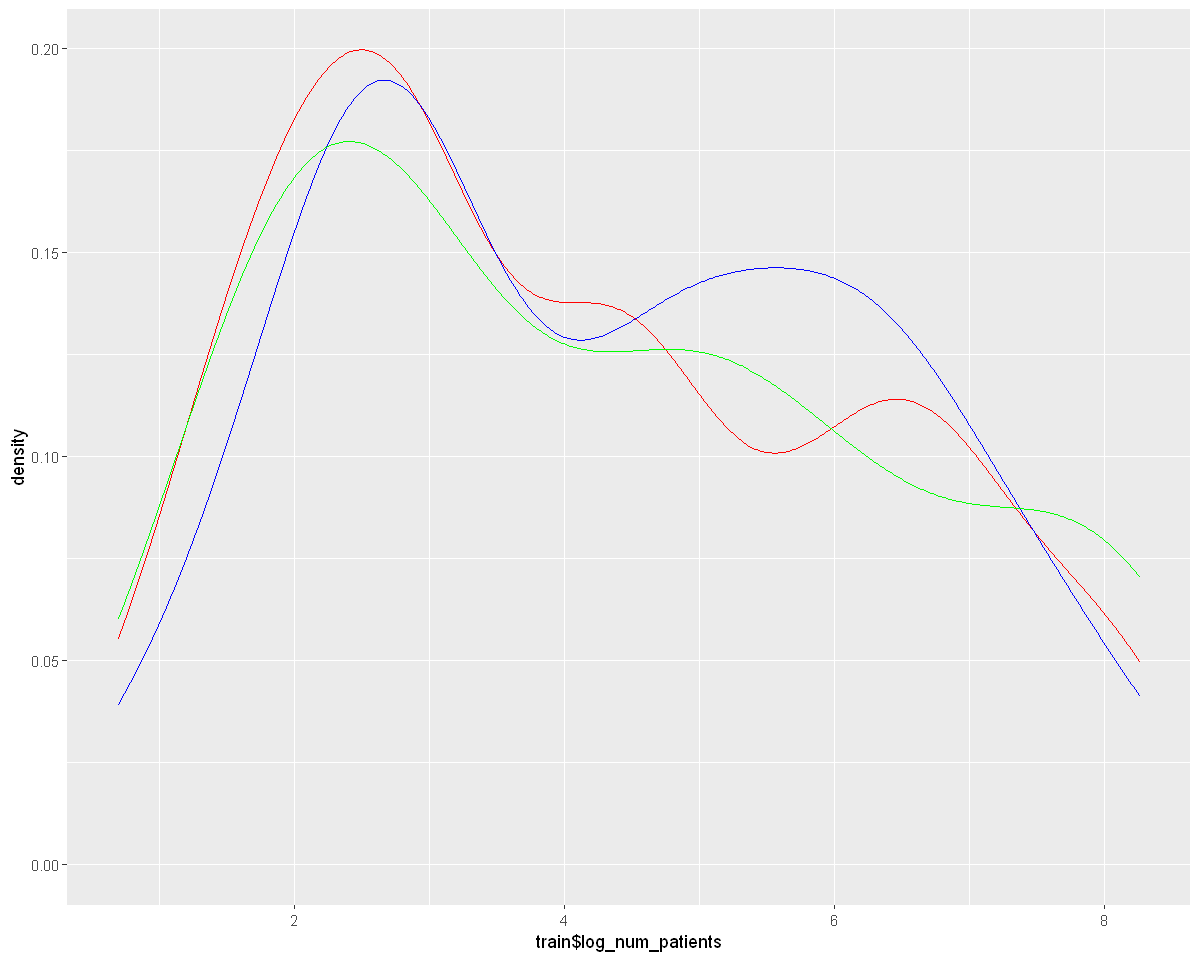

In [59]:
ggplot() +
    geom_density(aes(x=train$log_num_patients),color="red",alpha=0.3) +
    geom_density(aes(x=dev$log_num_patients),color="blue",alpha=0.3) +
    geom_density(aes(x=test$log_num_patients),color="green",alpha=0.3)

# seems to be working in spite of the struggle above. 

In [60]:
# test this again..
mod1 <- ranger(log_num_patients ~., data=train)

In [61]:
pred1 <- predict(mod1, data=test)

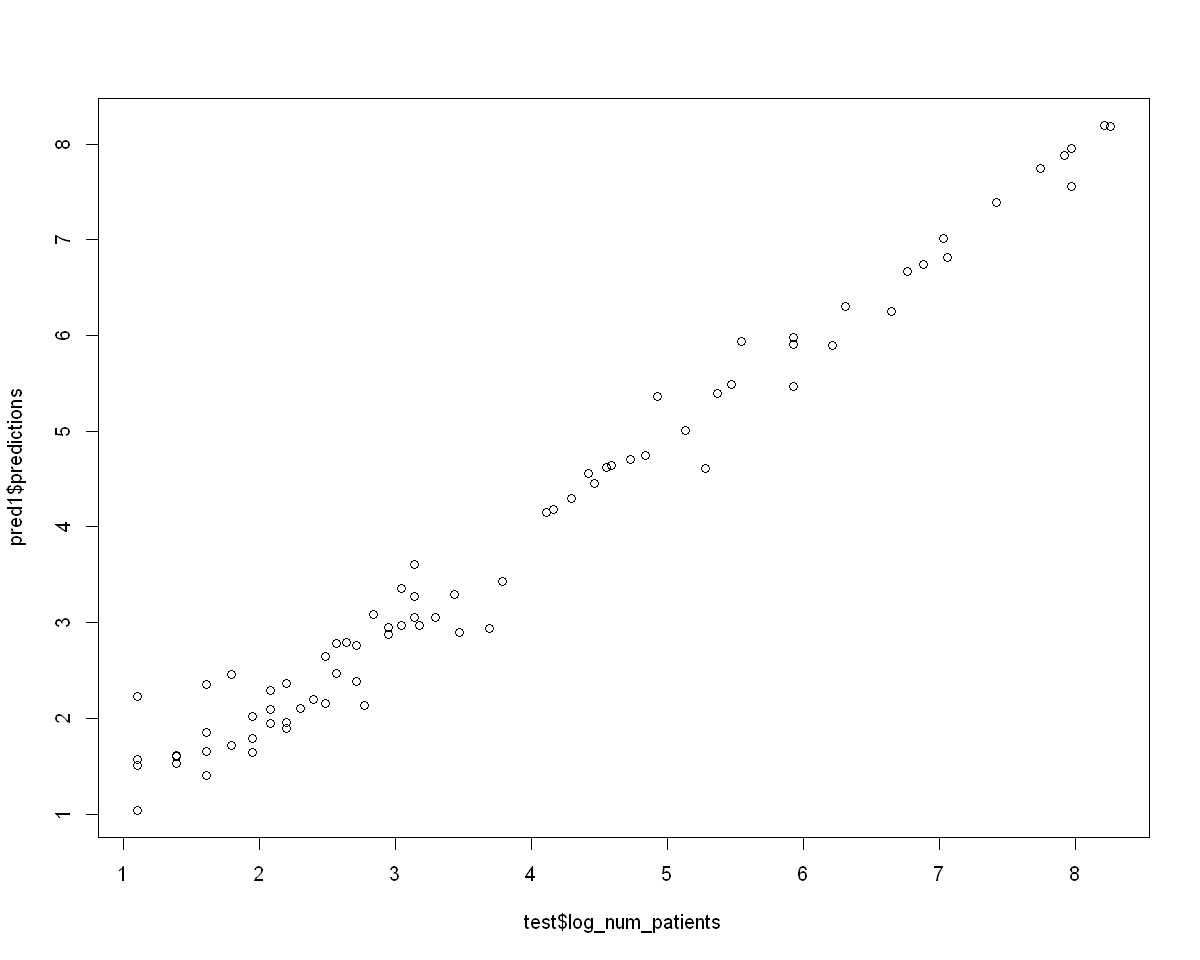

In [62]:
plot(pred1$predictions ~ test$log_num_patients)

### I Think it's better distributed with more dots at the higher patient number area. 

In [63]:
# I have the 3 sets for the next round:
write.csv(train, "train19.csv", row.names = F) 
write.csv(dev, "dev19.csv", row.names = F) 
write.csv(test, "test19.csv", row.names = F) 